In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Đọc dữ liệu
df = pd.read_csv("data/student_performance_data.csv")

# 1️⃣ Kiểm tra dữ liệu thiếu
print("Missing values:\n", df.isnull().sum())

# 2️⃣ Encode dữ liệu dạng chữ
label_columns = ['Gender', 'PartTimeJob', 'ExtraCurricularActivities']

for col in label_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1})

# Encode 'Major' bằng LabelEncoder
le = LabelEncoder()
df['Major'] = le.fit_transform(df['Major'])

# 3️⃣ Kiểm tra dữ liệu ngoại lai (Outlier) bằng thống kê mô tả
print("\nData description:\n", df.describe())

# 4️⃣ Chuẩn hóa dữ liệu số (trừ StudentID & Major)
scaler = MinMaxScaler()
scaled_columns = ['Age', 'StudyHoursPerWeek', 'AttendanceRate']

df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# 5️⃣ In dữ liệu sau tiền xử lý
print("\nDữ liệu sau khi tiền xử lý:\n", df.head())

# Nếu muốn lưu lại file:
df.to_csv("student_performance_processed.csv", index=False)


Missing values:
 StudentID                    0
Gender                       0
Age                          0
StudyHoursPerWeek            0
AttendanceRate               0
GPA                          0
Major                        0
PartTimeJob                  0
ExtraCurricularActivities    0
dtype: int64

Data description:
         StudentID      Gender         Age  StudyHoursPerWeek  AttendanceRate  \
count  500.000000  500.000000  500.000000         500.000000      500.000000   
mean   250.500000    0.512000   20.956000          19.876000       74.990380   
std    144.481833    0.500357    2.000517          11.471347       14.565917   
min      1.000000    0.000000   18.000000           1.000000       50.010000   
25%    125.750000    0.000000   19.000000          10.000000       62.607500   
50%    250.500000    1.000000   21.000000          20.500000       75.730000   
75%    375.250000    1.000000   23.000000          30.000000       87.220000   
max    500.000000    1.000000  

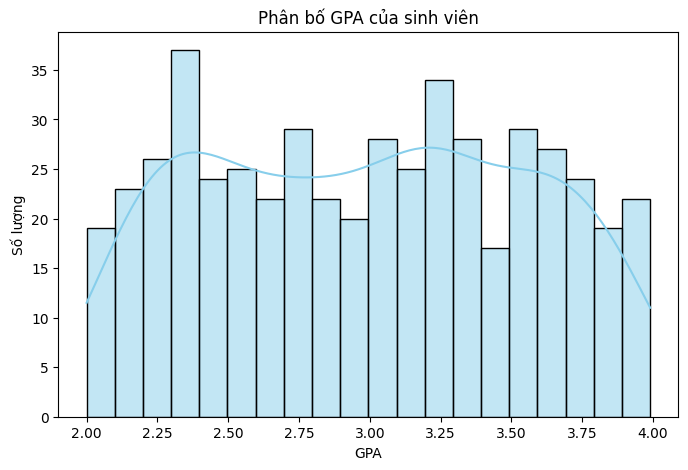

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ phân bố GPA
plt.figure(figsize=(8,5))
sns.histplot(df['GPA'], bins=20, kde=True, color='skyblue')
plt.title('Phân bố GPA của sinh viên')
plt.xlabel('GPA')
plt.ylabel('Số lượng')
plt.show()


In [4]:
def classify_gpa(gpa):
    if 2.0 <= gpa < 3.0:
        return 0  # Trung bình - Khá
    elif 3.0 <= gpa <= 4.0:
        return 1  # Giỏi - Xuất sắc
    else:
        return None  # Ngoài vùng -> loại bỏ

# Thêm cột phân loại
df['GPA_Class'] = df['GPA'].apply(classify_gpa)

# Xoá các dòng không hợp lệ (nếu có GPA < 2.0 hoặc > 4.0)
df = df.dropna(subset=['GPA_Class']).reset_index(drop=True)

# Kiểm tra số lượng từng nhóm
print(df['GPA_Class'].value_counts())

# Xem thử 10 dòng đầu
print(df[['GPA', 'GPA_Class']].head(10))

GPA_Class
1    253
0    247
Name: count, dtype: int64
    GPA  GPA_Class
0  3.47          1
1  2.32          0
2  2.38          0
3  3.46          1
4  2.31          0
5  2.47          0
6  3.93          1
7  2.51          0
8  3.32          1
9  3.96          1


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loại bỏ các dòng không hợp lệ
df = df.dropna(subset=['GPA_Class']).reset_index(drop=True)

# Encode cột chữ
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Major'] = le.fit_transform(df['Major'])
df['PartTimeJob'] = le.fit_transform(df['PartTimeJob'])
df['ExtraCurricularActivities'] = le.fit_transform(df['ExtraCurricularActivities'])

# Xác định X và y
X = df[['Gender', 'Age', 'StudyHoursPerWeek', 'AttendanceRate', 'Major', 'PartTimeJob', 'ExtraCurricularActivities']]
y = df['GPA_Class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tách train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'ANN': MLPClassifier(max_iter=1000)
}

# Duyệt qua từng mô hình để huấn luyện và đánh giá
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán
    y_pred = model.predict(X_test)
    
    # Đánh giá mô hình
    print(f"### {model_name} ###")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


### SVM ###
Accuracy: 0.51
Confusion Matrix:
 [[23 27]
 [22 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.46      0.48        50
           1       0.51      0.56      0.53        50

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100

--------------------------------------------------
### KNN ###
Accuracy: 0.56
Confusion Matrix:
 [[31 19]
 [25 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.62      0.58        50
           1       0.57      0.50      0.53        50

    accuracy                           0.56       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.56      0.56      0.56       100

--------------------------------------------------
### Decision Tree ###
Accuracy: 0.53
Confusion Matrix:
 [[25 25]

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
